# Voxel occupancy as global feature

In this notebook we will use a grid of voxels along with its respective occupancy to build a binary vector that will serve as a global feature for representing the 3D data.

The vector will have a value of 0 if the voxel is not occuped and 1 otherwise.

In [1]:
import h5py
import os
import numpy as np
from IPython.display import Image
from pyntcloud.structures.voxelgrid import VoxelGrid
from matplotlib import pyplot as plt


In [2]:
DATA_PATH = "data/"

In [3]:
%matplotlib inline
plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'gray'

## Read 2 digits from HDF5 file

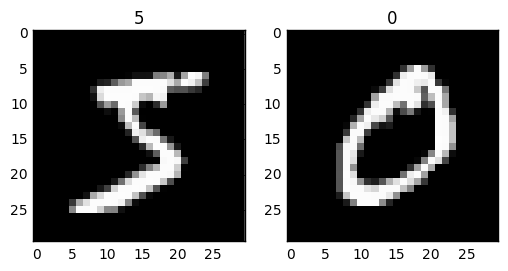

In [4]:
with h5py.File("D:/GitHub/3DMNIST/data/train_small.h5", "r") as hf:    

    a = hf["0"]
    b = hf["1"]
    
    digit_a = (a["img"][:], a["points"][:], a.attrs["label"]) 
    digit_b = (b["img"][:], b["points"][:], b.attrs["label"]) 

plt.subplot(121)
plt.title(digit_a[2])
plt.imshow(digit_a[0])

plt.subplot(122)
plt.title(digit_b[2])
plt.imshow(digit_b[0])

## Generate VoxelGrid

For the genration of the VoxelGrid we will use a library for managing point clouds that I'm working on: [pyntcloud](https://github.com/daavoo/pyntcloud)

The VoxelGrid will fit an axis-aligned bounding box around the point cloud and then subdivide the box in segments along each corresponding axis.

The `x_y_z` argument indicates how many segments we want per axis. 

We will split each axis in 8 voxels wich would be equivalent to use the 3th level of an Octree.

This will generate a total of 512 different voxels.

In [5]:
a_voxelgrid = VoxelGrid(digit_a[1], x_y_z=[8, 8, 8])
b_voxelgrid = VoxelGrid(digit_b[1], x_y_z=[8, 8, 8])

This will generate an object with several attributes.

In the `structure` attribute we can find a 2D array where each row represents a point in the original point cloud and each column represents the n_voxel where it lies with respect to [x_axis, y_axis, z_axis, global].

In [6]:
# point coordinates
digit_a[1][340]

array([ 0.13965517, -0.1094358 ,  0.47305447])

In [7]:
# n_voxel
a_voxelgrid.structure[340]

array([  5,   3,   7, 491])

In [8]:
digit_b[1][5200]

array([ 0.05689655,  0.37270992,  0.32146947])

In [9]:
b_voxelgrid.structure[5200]

array([  4,   7,   6, 423])

## Visualize the VoxelGrid.structure

We can use the information in the voxelgrid structure to visualize it in different ways.

In [10]:
def plot_colorfull_hist(array):
    cm = plt.cm.get_cmap('gist_rainbow')
    n, bins, patches = plt.hist(array, bins=64)

    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    # scale values to interval [0,1]
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.show()

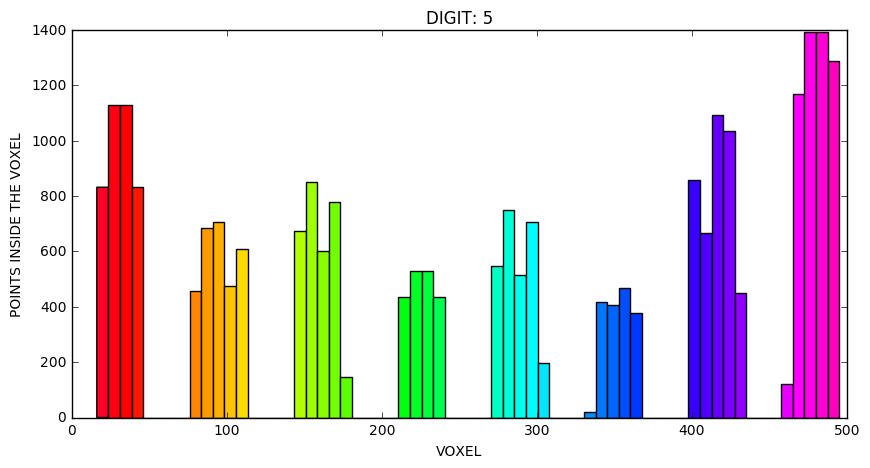

In [11]:
plt.figure(figsize=(10,5))
plt.title("DIGIT: " + str(digit_a[-1]))
plt.xlabel("VOXEL")
plt.ylabel("POINTS INSIDE THE VOXEL")
plot_colorfull_hist(a_voxelgrid.structure[:,-1])

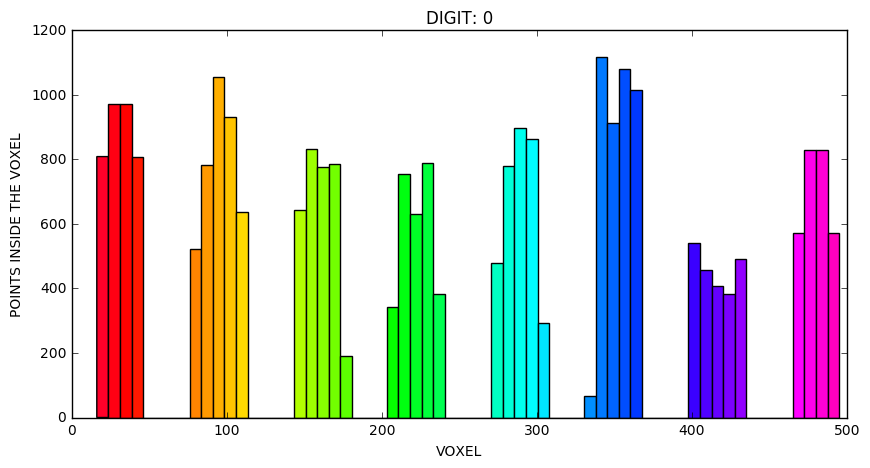

In [12]:
plt.figure(figsize=(10,5))
plt.title("DIGIT: " + str(digit_b[-1]))
plt.xlabel("VOXEL")
plt.ylabel("POINTS INSIDE THE VOXEL")
plot_colorfull_hist(b_voxelgrid.structure[:,-1])

As we can see in the histograms there is a lot of empty voxels. This is due to the use of a cuboid bounding box to ensure that the VoxelGrid will divide the cloud in a similar way even when the point clouds are oriented to different directions.

We can use the built-in function `plot()` to visualize the voxelgrid.

The function will display the voxelgrid sliced around the z-axis. 

You might need a nice spatial vision capacity to visualize the point cloud.

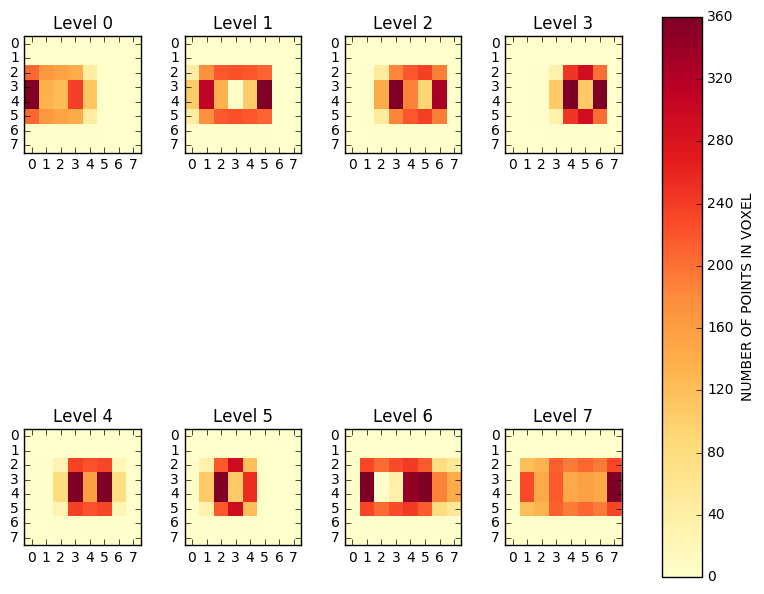

In [13]:
a_voxelgrid.plot()

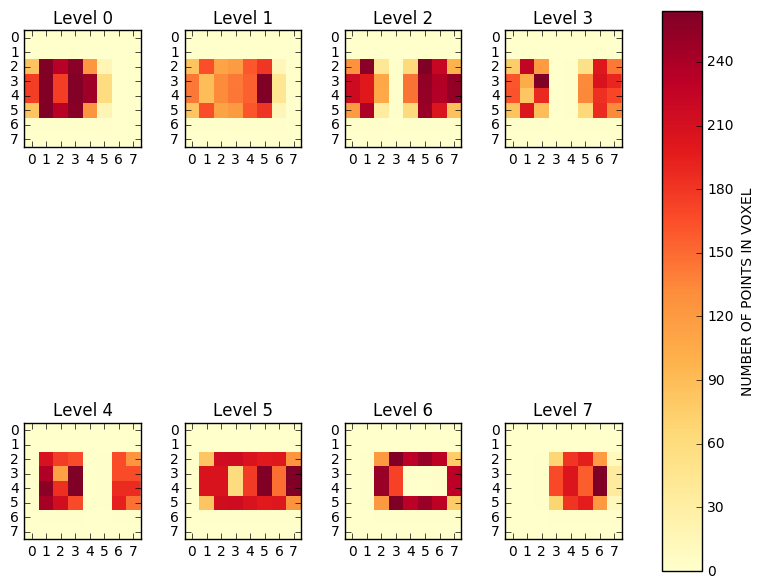

In [14]:
b_voxelgrid.plot()

Or even better we can save the voxelgrid's structure as scalar fields of the original point cloud and visualize it in any 3D software that supports point clouds and scalar fields (I like [CloudCompare](http://www.cloudcompare.org/)). 

In [15]:
cloud_a = np.concatenate((digit_a[1], a_voxelgrid.structure), axis=1)
cloud_b = np.concatenate((digit_b[1], b_voxelgrid.structure), axis=1)

np.savetxt("data/"+ str(digit_a[2]) + ".txt", cloud_a)
np.savetxt("data/"+ str(digit_b[2]) + ".txt", cloud_b)

### Associate voxel along X axis

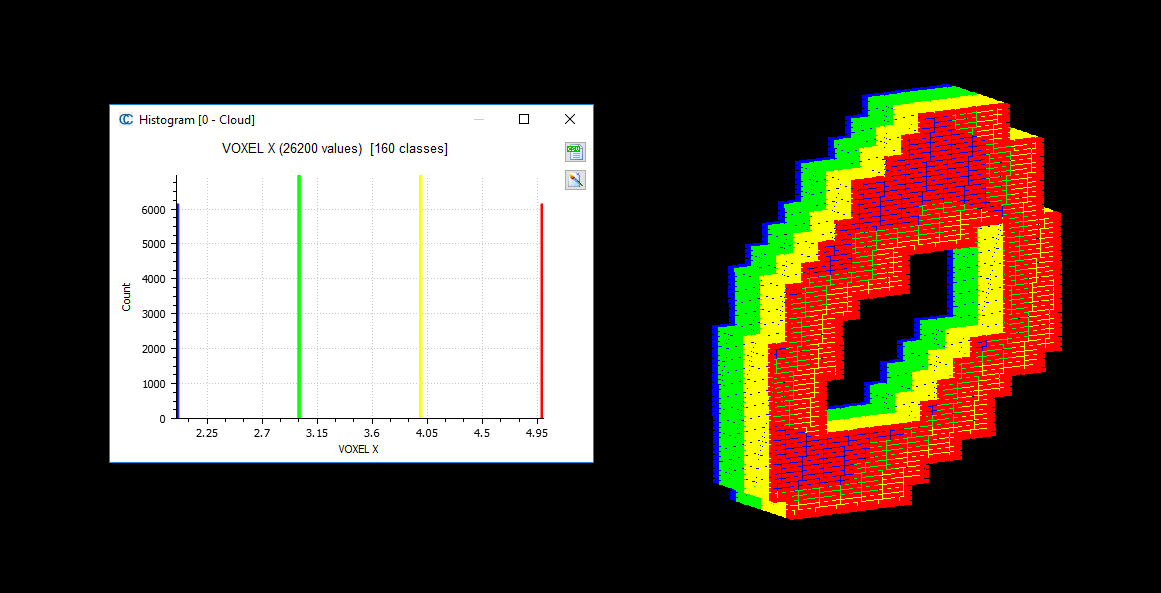

In [16]:
Image(DATA_PATH + "0_X.png")

### Associate voxel along Y axis

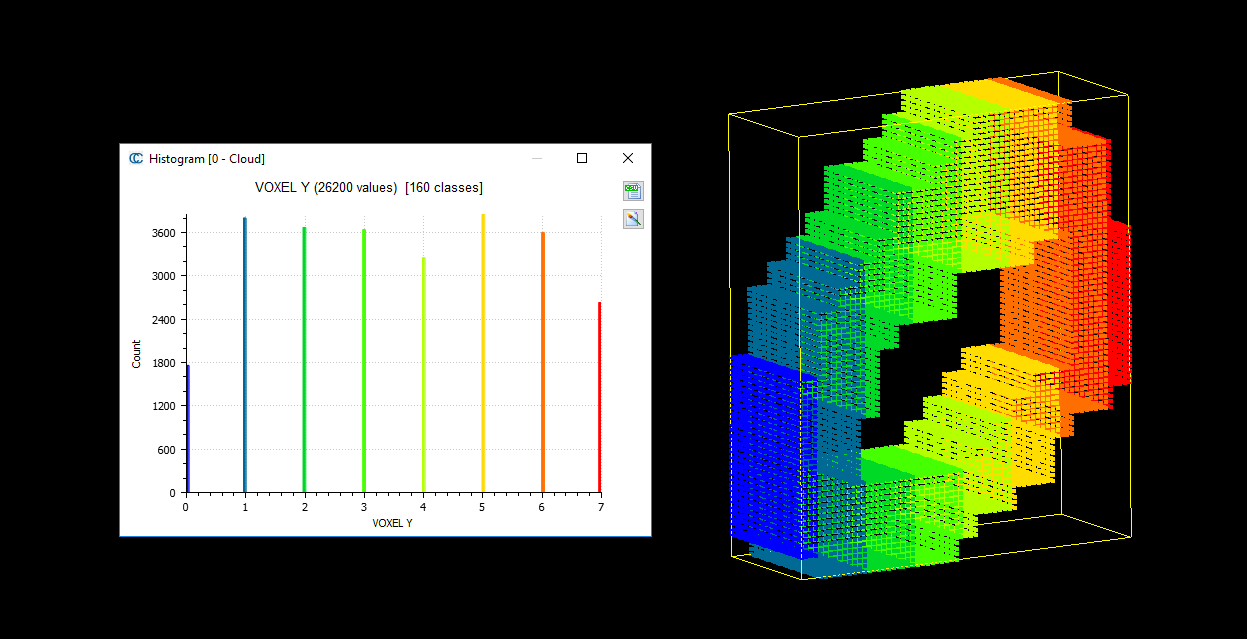

In [17]:
Image(DATA_PATH + "0_Y.png")

### Associate voxel along Z axis

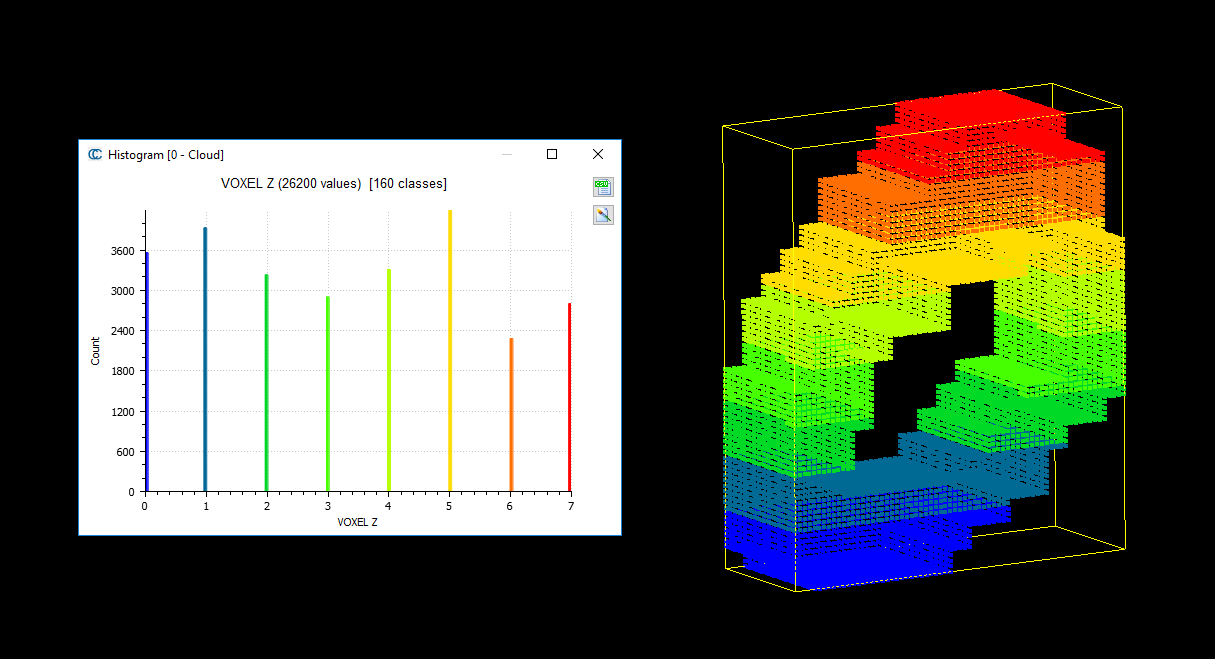

In [18]:
Image(DATA_PATH + "0_Z.png")

### GLOBAL associate voxel

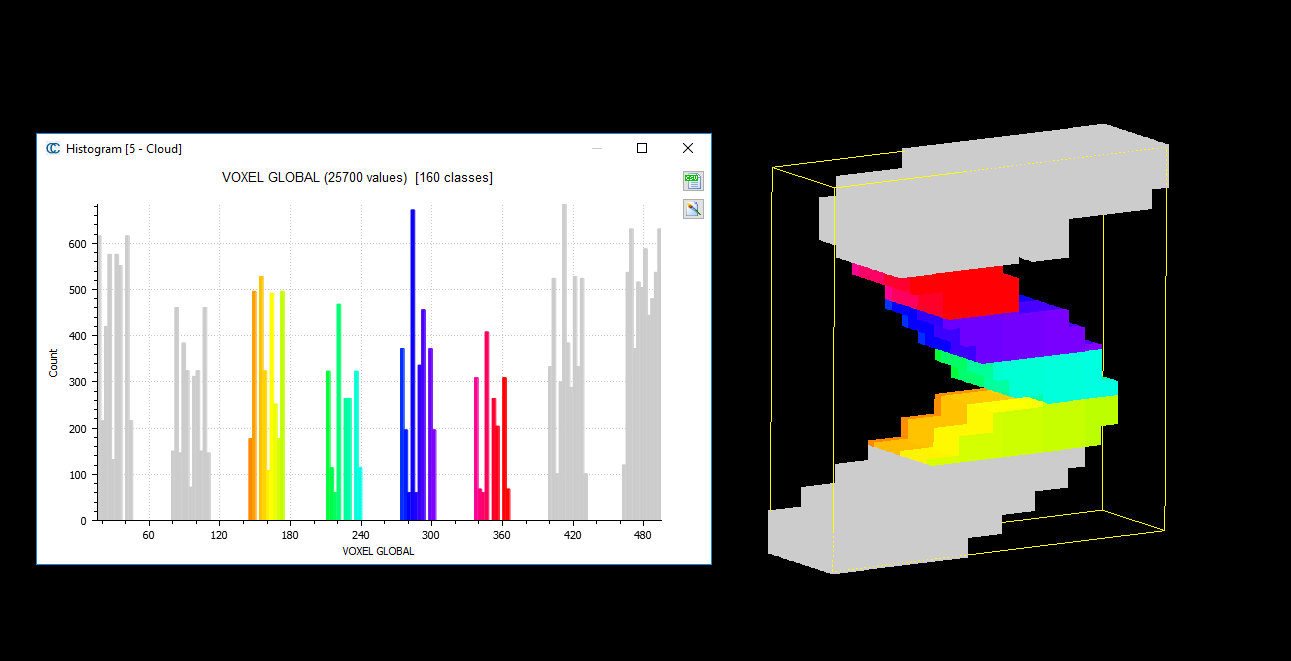

In [19]:
Image(DATA_PATH + "5_N.png")

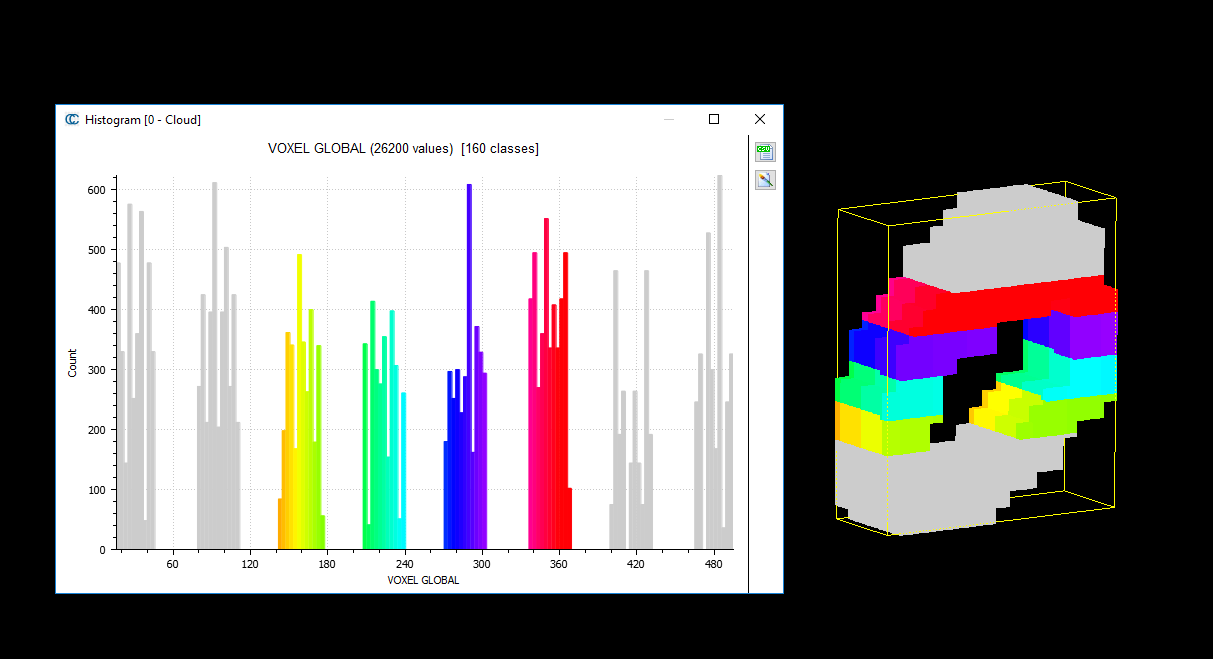

In [20]:
Image(DATA_PATH + "0_N.png")

## Generate the global feature vector for all the dataset

As we see in the picture the voxel global is the feature that contains information about all the 3 axis combined. 

The voxel global count is stored in the voxelgrid.vector attribute.

This vector holds the count of points that lie inside each of the gloabl voxels.

In [21]:
a_voxelgrid.vector

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 241, 195, 180, 165,  51,   0,   0,   0, 420, 156,
       144, 276, 132,   0,   0,   0, 420, 156, 144, 276, 132,   0,   0,
         0, 241, 195, 180, 165,  51,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  27, 123, 152, 156, 153, 146,   0,   0,  72, 216,  96,
         0,  72, 252,   0,   0,  72, 216,  96,   0,  72, 252,   0,   0,
        27, 123, 152, 156, 153, 146,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  35, 142, 168, 182, 146,   0,   0,   0, 108, 276,
       144,  72, 252,   0,   0,   0, 108, 276, 144,  72, 252,   0,   0,
         0,  35, 142, 168, 182, 146,   0,   0,   0,   0,   0,   

We can use the voxelgrid.vector as a global feature for representing the 3D digits.

In [22]:
# define a callable for the h5py's visit method

def to_vector(name):
    global i
    if isinstance(hf[name], h5py.Group):
        if i % 200 == 0:
            print(i,"\tof",len(hf.keys()), "processed")

        voxelgrid = VoxelGrid(hf[name]["points"][:], x_y_z=[8, 8, 8])
        
        # make the vector range 0-1
        out[0][int(name)] = voxelgrid.vector / np.max(voxelgrid.vector)
        out[1][int(name)] = hf[name].attrs["label"]
        i += 1

### Train

In [23]:
i = 0
if not os.path.exists(DATA_PATH + "voxelgrid.npz"):
    with h5py.File("D:/GitHub/3DMNIST/data/train_small.h5", "r") as hf:
        # tuple to store the vectors and labels
        out = (np.zeros((len(hf.keys()), 512), dtype="f"), np.zeros(len(hf.keys()), dtype=np.int8))
        i = 0
        hf.visit(to_vector)
    print ("DONE")
    train_set = out

0 	of 5000 processed
200 	of 5000 processed
400 	of 5000 processed
600 	of 5000 processed
800 	of 5000 processed
1000 	of 5000 processed
1200 	of 5000 processed
1400 	of 5000 processed
1600 	of 5000 processed
1800 	of 5000 processed
2000 	of 5000 processed
2200 	of 5000 processed
2400 	of 5000 processed
2600 	of 5000 processed
2800 	of 5000 processed
3000 	of 5000 processed
3200 	of 5000 processed
3400 	of 5000 processed
3600 	of 5000 processed
3800 	of 5000 processed
4000 	of 5000 processed
4200 	of 5000 processed
4400 	of 5000 processed
4600 	of 5000 processed
4800 	of 5000 processed
DONE


### Test

In [24]:
i = 0
if not os.path.exists(DATA_PATH + "voxelgrid.npz"):
    with h5py.File("D:/GitHub/3DMNIST/data/test_small.h5", "r") as hf:
        # tuple to store the vectors and labels
        out = (np.zeros((len(hf.keys()), 512), dtype="f"), np.zeros(len(hf.keys()), dtype=np.int8))

        hf.visit(to_vector)
    print ("DONE")
    test_set = out

0 	of 1000 processed
200 	of 1000 processed
400 	of 1000 processed
600 	of 1000 processed
800 	of 1000 processed
DONE


### Valid

In [25]:
i = 0
if not os.path.exists(DATA_PATH + "voxelgrid.npz"):
    with h5py.File("D:/GitHub/3DMNIST/data/valid_small.h5", "r") as hf:
        # tuple to store the vectors and labels
        out = (np.zeros((len(hf.keys()), 512), dtype="f"), np.zeros(len(hf.keys()), dtype=np.int8))

        hf.visit(to_vector)
    print ("DONE")
    valid_set = out

0 	of 1000 processed
200 	of 1000 processed
400 	of 1000 processed
600 	of 1000 processed
800 	of 1000 processed
DONE


## Save all to npz file

In [26]:
if not os.path.exists(DATA_PATH + "voxelgrid.npz"):
    np.savez_compressed("voxelgrid.npz", X_train=train_set[0], y_train=train_set[1], \
                        X_test=test_set[0], y_test=test_set[1], X_valid=valid_set[0], y_valid=valid_set[1])